<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-13 16:49:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  44.4MB/s    in 3.4s    

2025-07-13 16:49:22 (44.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


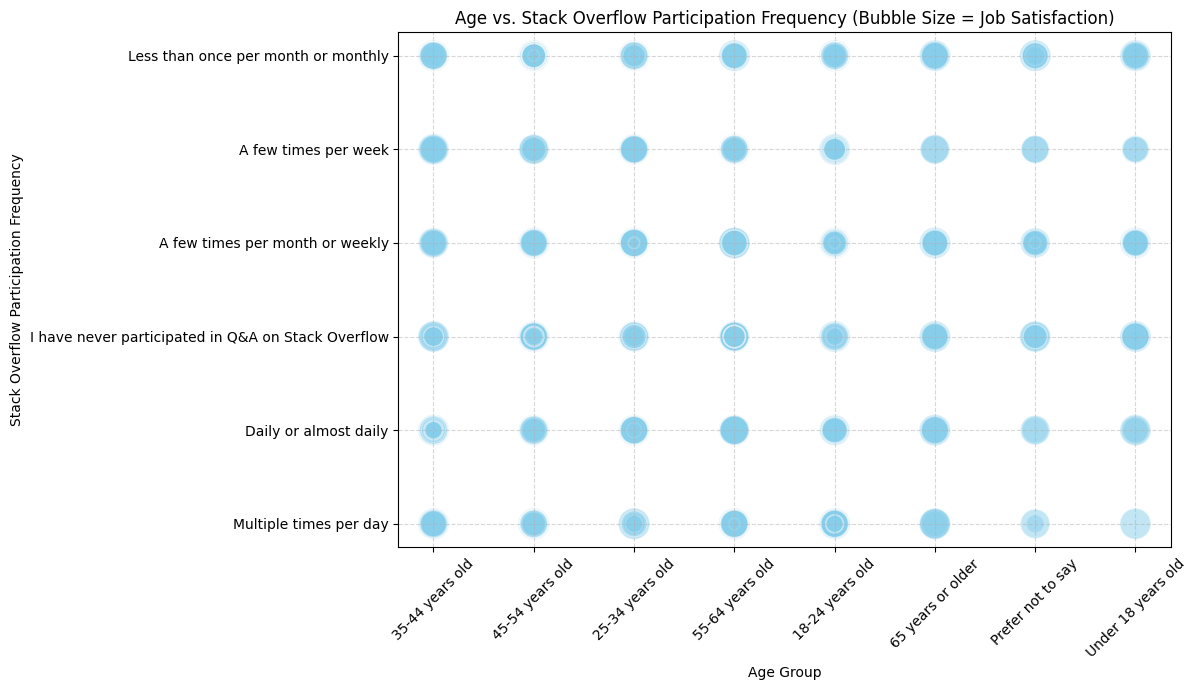

In [3]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Query relevant columns
query = """
SELECT Age, SOPartFreq, JobSat
FROM main
WHERE Age IS NOT NULL AND SOPartFreq IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Optional: Reduce bubble size range for better visual scaling
df['BubbleSize'] = pd.to_numeric(df['JobSat'], errors='coerce') * 20  # Scale up for visibility

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Age',
    y='SOPartFreq',
    size='BubbleSize',
    sizes=(20, 500),
    alpha=0.5,
    legend=False,
    color='skyblue'
)

plt.title("Age vs. Stack Overflow Participation Frequency (Bubble Size = Job Satisfaction)")
plt.xlabel("Age Group")
plt.ylabel("Stack Overflow Participation Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


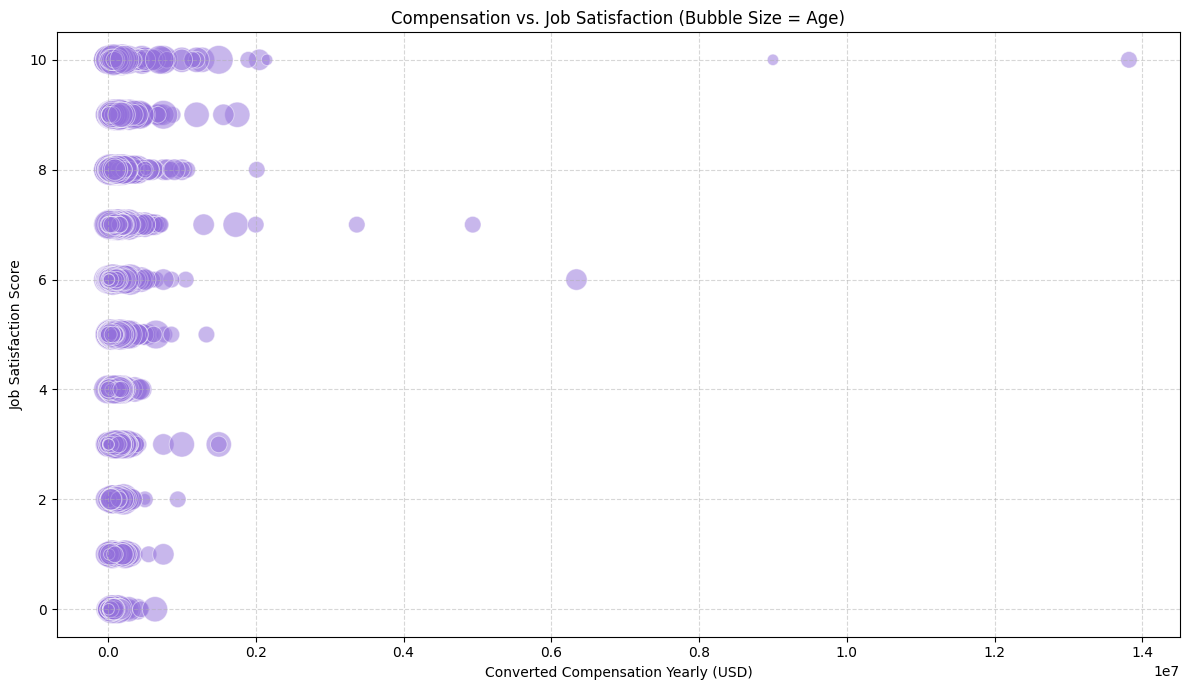

In [4]:
##Write your code here


import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Query relevant columns
query = """
SELECT ConvertedCompYearly, JobSat, Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSat IS NOT NULL 
  AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Map age ranges to approximate numeric values
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 67,
    "Prefer not to say": None
}
df["AgeNumeric"] = df["Age"].map(age_map)

# Drop rows with unmapped or null age values
df = df.dropna(subset=["AgeNumeric"])

# Optional: scale bubble size for visibility
df["BubbleSize"] = df["AgeNumeric"] * 5

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x="ConvertedCompYearly",
    y="JobSat",
    size="BubbleSize",
    sizes=(20, 500),
    alpha=0.5,
    color="mediumpurple",
    legend=False
)

plt.title("Compensation vs. Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Converted Compensation Yearly (USD)")
plt.ylabel("Job Satisfaction Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



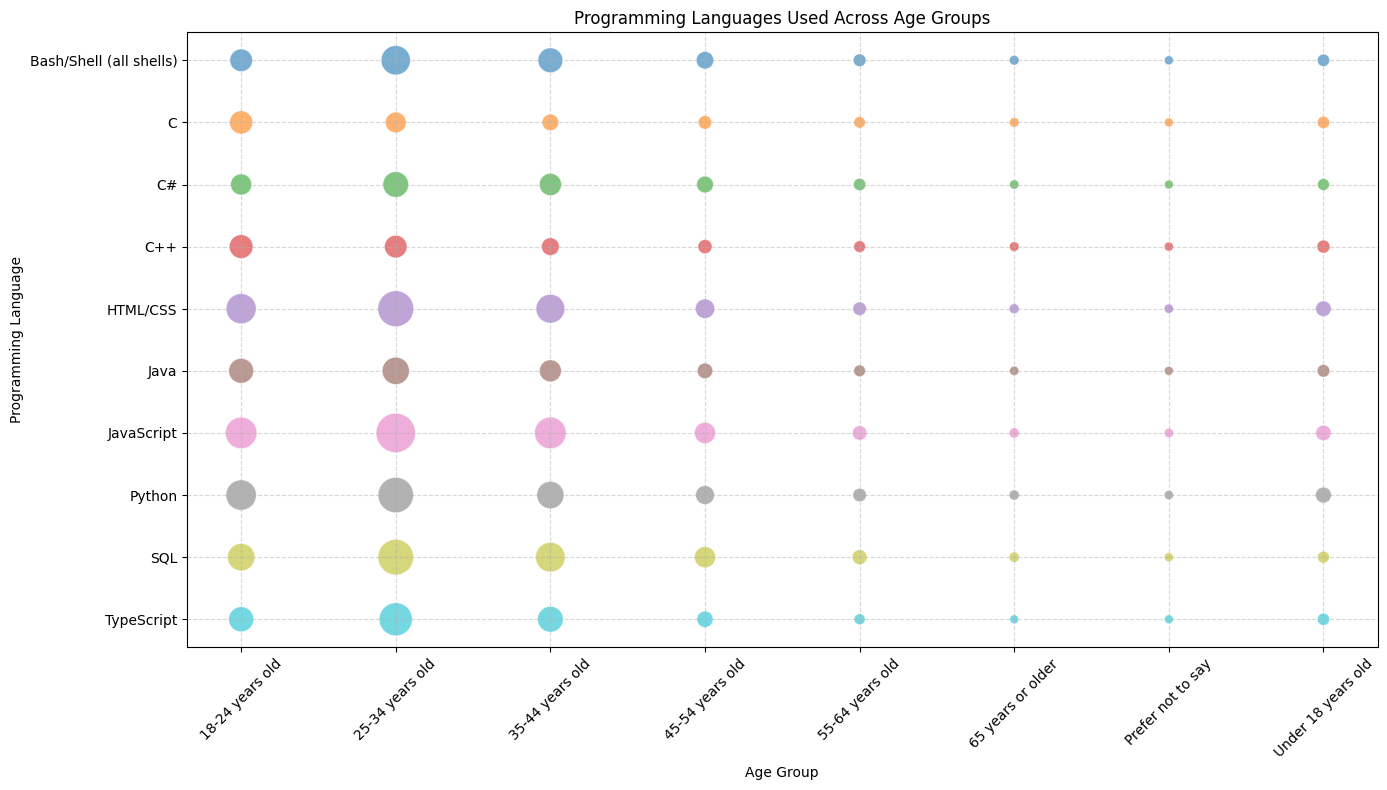

In [5]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 1: Load necessary columns
query = """
SELECT Age, LanguageHaveWorkedWith
FROM main
WHERE Age IS NOT NULL AND LanguageHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 2: Expand multiple languages per respondent into individual rows
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].str.split(";")
df_exploded = df.explode("LanguageHaveWorkedWith")

# Step 3: Clean and standardize
df_exploded["LanguageHaveWorkedWith"] = df_exploded["LanguageHaveWorkedWith"].str.strip()

# Step 4: Group by Age and Language
lang_age_counts = df_exploded.groupby(["Age", "LanguageHaveWorkedWith"]).size().reset_index(name="Count")

# Step 5: Filter to Top 10 languages (optional for clarity)
top_languages = lang_age_counts.groupby("LanguageHaveWorkedWith")["Count"].sum().nlargest(10).index
lang_age_counts = lang_age_counts[lang_age_counts["LanguageHaveWorkedWith"].isin(top_languages)]

# Step 6: Plot the bubble chart
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=lang_age_counts,
    x="Age",
    y="LanguageHaveWorkedWith",
    size="Count",
    hue="LanguageHaveWorkedWith",
    sizes=(40, 800),
    alpha=0.6,
    legend=False
)

plt.title("Programming Languages Used Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Programming Language")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


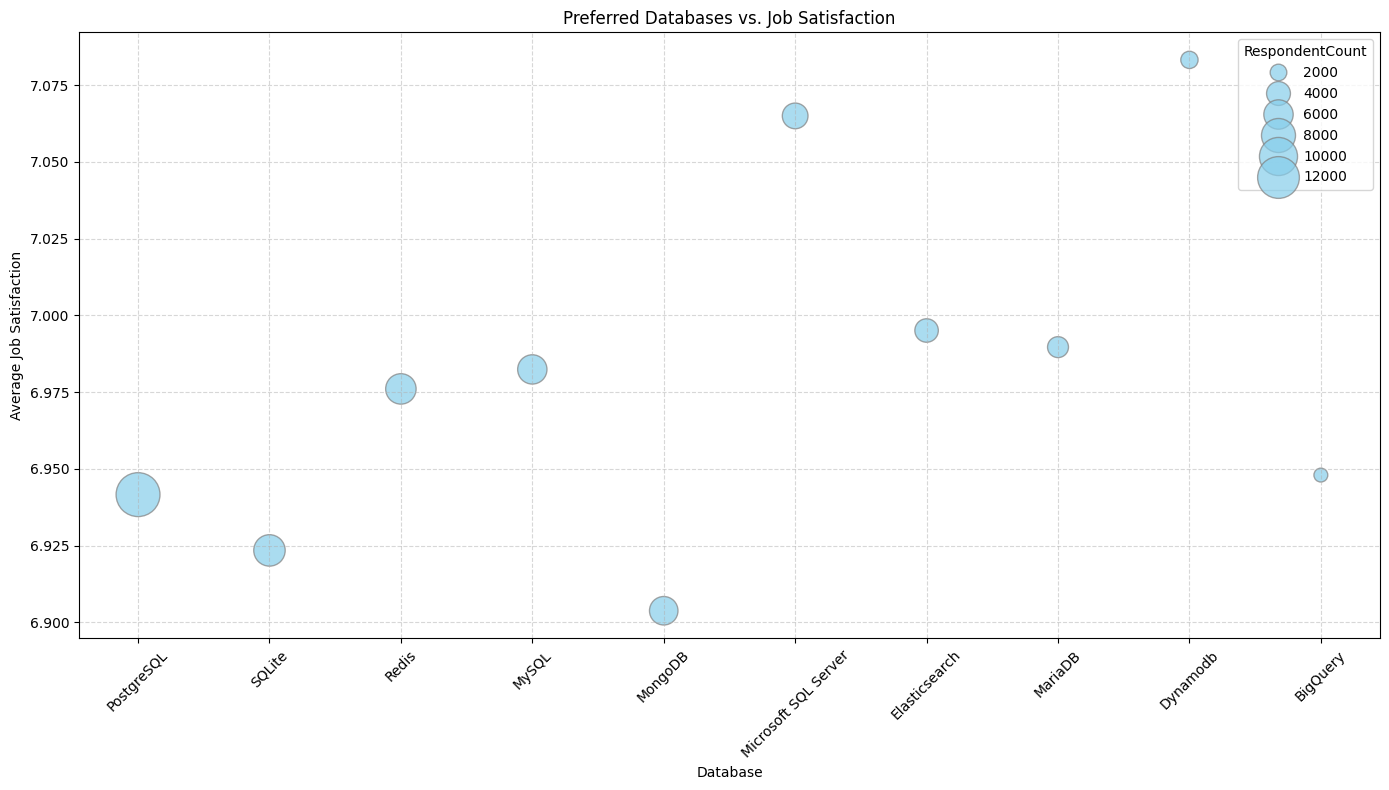

In [6]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 1: Load necessary columns
query = """
SELECT DatabaseWantToWorkWith, JobSat
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 2: Split multiple databases into separate rows
df["DatabaseWantToWorkWith"] = df["DatabaseWantToWorkWith"].str.split(";")
df_exploded = df.explode("DatabaseWantToWorkWith")
df_exploded["DatabaseWantToWorkWith"] = df_exploded["DatabaseWantToWorkWith"].str.strip()

# Step 3: Group by database and compute average satisfaction and count
grouped = df_exploded.groupby("DatabaseWantToWorkWith").agg(
    AvgJobSat=("JobSat", "mean"),
    RespondentCount=("JobSat", "count")
).reset_index()

# Optional: Filter to top 10 most popular databases for readability
top_databases = grouped.nlargest(10, "RespondentCount")

# Step 4: Plot bubble chart
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top_databases,
    x="DatabaseWantToWorkWith",
    y="AvgJobSat",
    size="RespondentCount",
    sizes=(100, 1000),
    alpha=0.7,
    color='skyblue',
    edgecolor='gray'
)

plt.title("Preferred Databases vs. Job Satisfaction")
plt.xlabel("Database")
plt.ylabel("Average Job Satisfaction")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


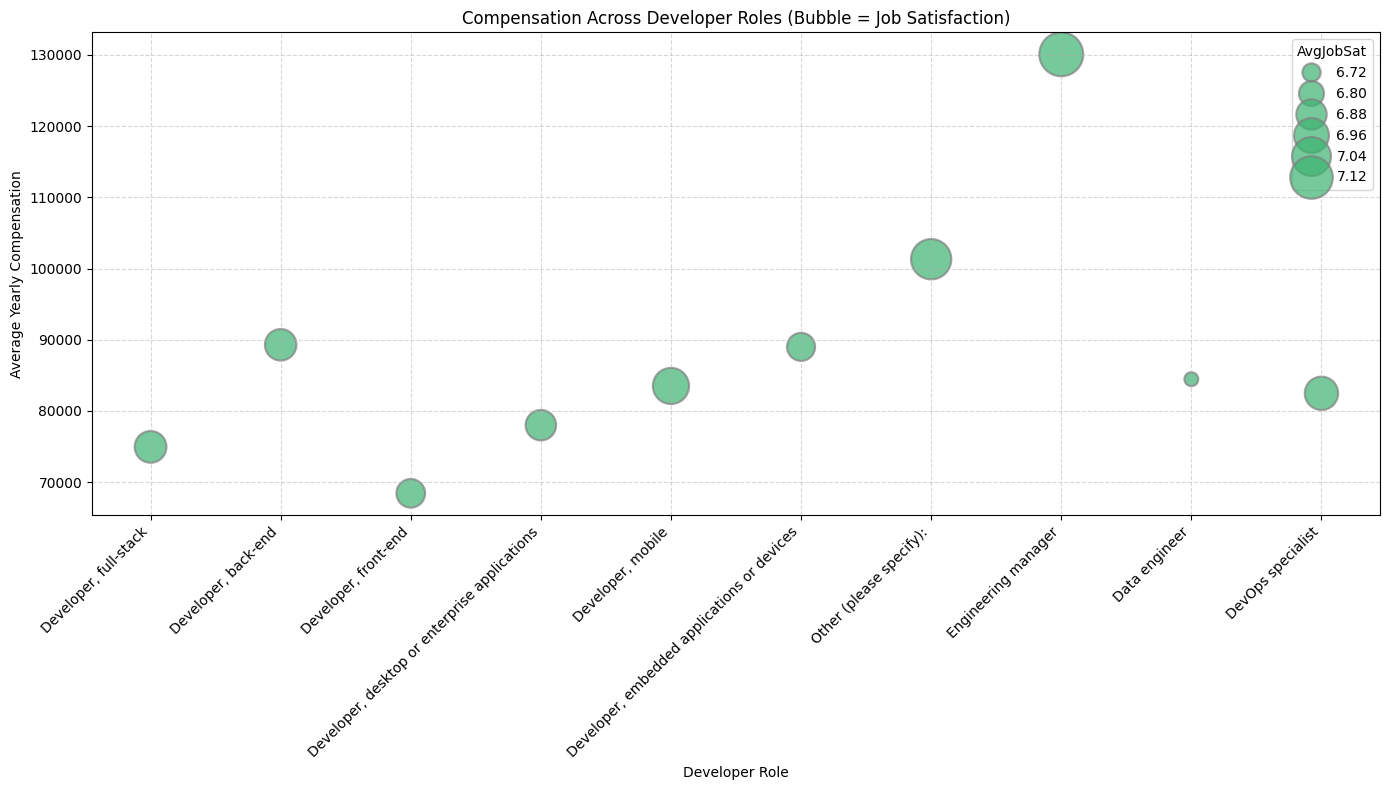

In [7]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 1: Load necessary columns
query = """
SELECT DevType, ConvertedCompYearly, JobSat
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 2: Split multiple DevTypes into separate rows
df["DevType"] = df["DevType"].str.split(";")
df_exploded = df.explode("DevType")
df_exploded["DevType"] = df_exploded["DevType"].str.strip()

# Step 3: Group by developer type
grouped = df_exploded.groupby("DevType").agg(
    AvgCompensation=("ConvertedCompYearly", "mean"),
    AvgJobSat=("JobSat", "mean"),
    RespondentCount=("JobSat", "count")
).reset_index()

# Optional: Limit to top 10 DevTypes by number of respondents
top_dev_roles = grouped.nlargest(10, "RespondentCount")

# Step 4: Bubble Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top_dev_roles,
    x="DevType",
    y="AvgCompensation",
    size="AvgJobSat",
    sizes=(100, 1000),
    alpha=0.7,
    color="mediumseagreen",
    edgecolor="gray"
)

plt.title("Compensation Across Developer Roles (Bubble = Job Satisfaction)")
plt.xlabel("Developer Role")
plt.ylabel("Average Yearly Compensation")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


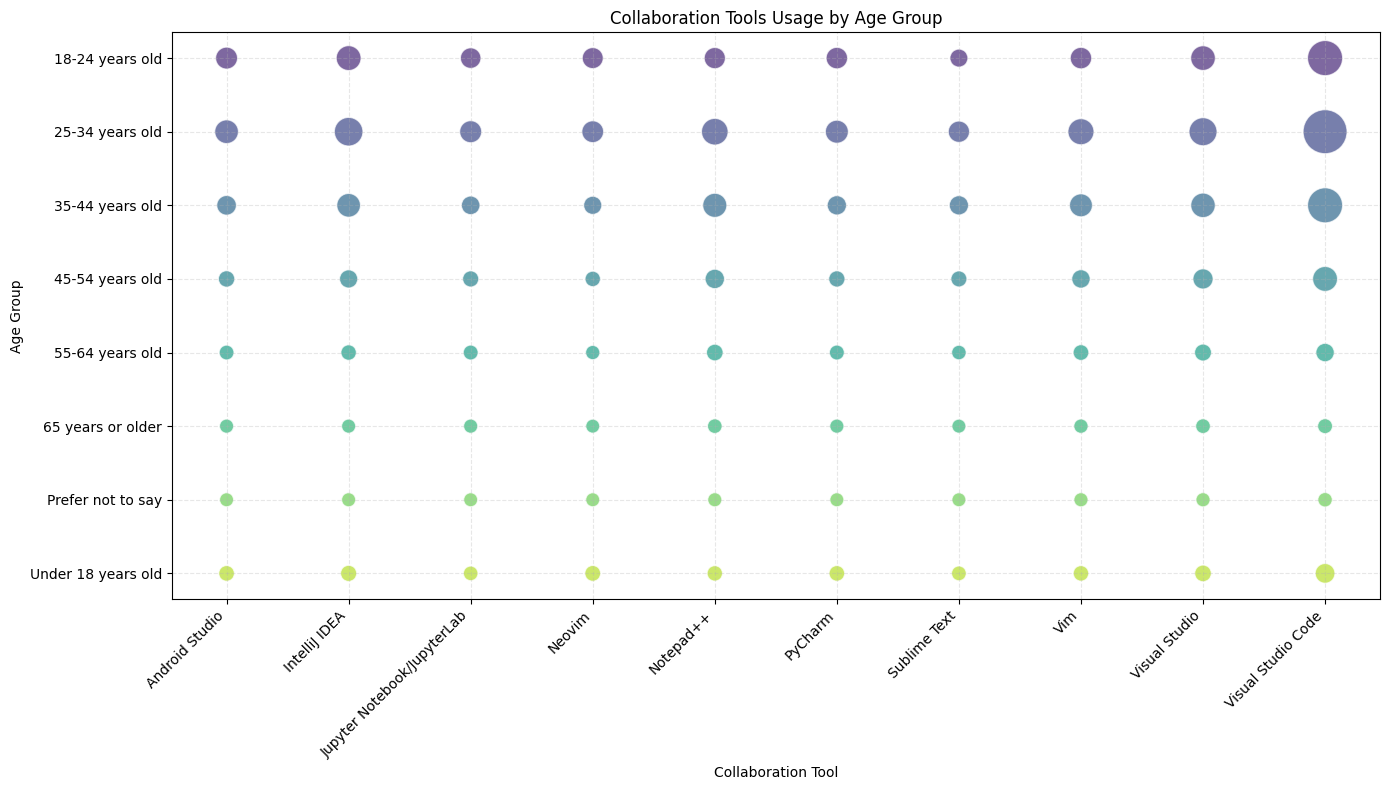

In [8]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 1: Load the relevant data
query = """
SELECT Age, NEWCollabToolsHaveWorkedWith
FROM main
WHERE Age IS NOT NULL AND NEWCollabToolsHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 2: Explode multiple collaboration tools into separate rows
df["NEWCollabToolsHaveWorkedWith"] = df["NEWCollabToolsHaveWorkedWith"].str.split(";")
df_exploded = df.explode("NEWCollabToolsHaveWorkedWith")
df_exploded["NEWCollabToolsHaveWorkedWith"] = df_exploded["NEWCollabToolsHaveWorkedWith"].str.strip()

# Step 3: Group by Tool and Age, count frequency
grouped = df_exploded.groupby(["NEWCollabToolsHaveWorkedWith", "Age"]).size().reset_index(name="UsageCount")

# Optional: Limit to top 10 most used tools for readability
top_tools = (
    grouped.groupby("NEWCollabToolsHaveWorkedWith")["UsageCount"]
    .sum()
    .nlargest(10)
    .index
)
filtered = grouped[grouped["NEWCollabToolsHaveWorkedWith"].isin(top_tools)]

# Step 4: Create the bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=filtered,
    x="NEWCollabToolsHaveWorkedWith",
    y="Age",
    size="UsageCount",
    sizes=(100, 1000),
    hue="Age",
    palette="viridis",
    legend=False,
    alpha=0.7
)

plt.title("Collaboration Tools Usage by Age Group")
plt.xlabel("Collaboration Tool")
plt.ylabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



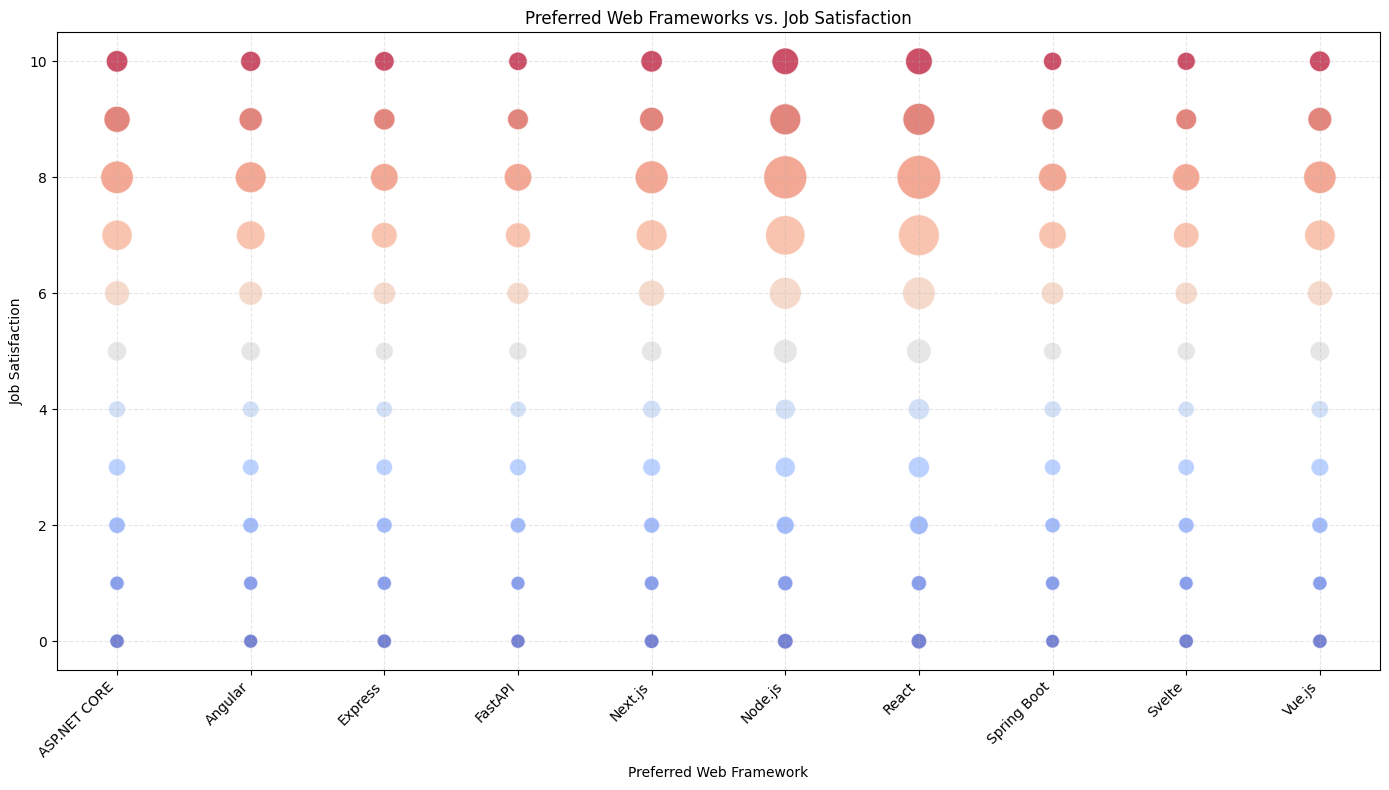

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Step 1: Connect to the database and extract relevant columns
conn = sqlite3.connect("survey-data.sqlite")
query = """
SELECT WebframeWantToWorkWith, JobSat
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 2: Split and explode multi-valued frameworks
df["WebframeWantToWorkWith"] = df["WebframeWantToWorkWith"].str.split(";")
df = df.explode("WebframeWantToWorkWith")
df["WebframeWantToWorkWith"] = df["WebframeWantToWorkWith"].str.strip()

# Step 3: Group by framework and JobSat, count frequency
grouped = df.groupby(["WebframeWantToWorkWith", "JobSat"]).size().reset_index(name="RespondentCount")

# Optional: Filter top 10 frameworks for clarity
top_frameworks = (
    grouped.groupby("WebframeWantToWorkWith")["RespondentCount"]
    .sum()
    .nlargest(10)
    .index
)
filtered = grouped[grouped["WebframeWantToWorkWith"].isin(top_frameworks)]

# Step 4: Bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=filtered,
    x="WebframeWantToWorkWith",
    y="JobSat",
    size="RespondentCount",
    sizes=(100, 1000),
    hue="JobSat",
    palette="coolwarm",
    alpha=0.7,
    legend=False
)

plt.title("Preferred Web Frameworks vs. Job Satisfaction")
plt.xlabel("Preferred Web Framework")
plt.ylabel("Job Satisfaction")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



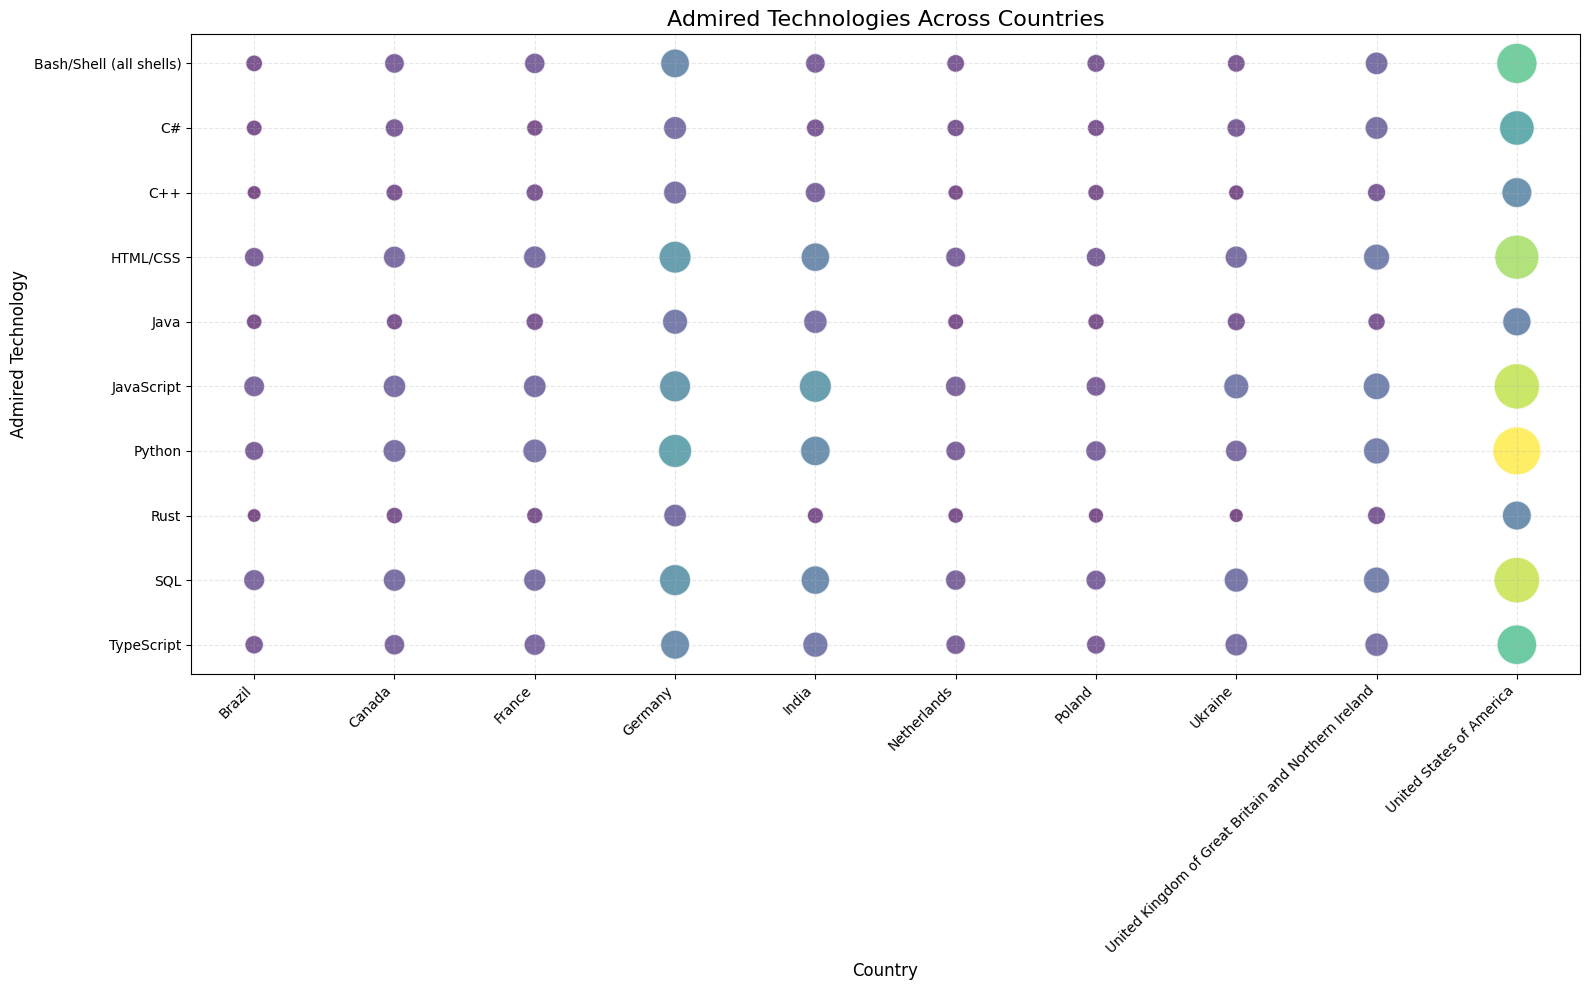

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query relevant columns
query = """
SELECT Country, LanguageAdmired 
FROM main 
WHERE Country IS NOT NULL AND LanguageAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split multi-value fields and explode
df["LanguageAdmired"] = df["LanguageAdmired"].str.split(";")
df = df.explode("LanguageAdmired")
df["LanguageAdmired"] = df["LanguageAdmired"].str.strip()

# Step 4: Group and count frequency
grouped = (
    df.groupby(["Country", "LanguageAdmired"])
    .size()
    .reset_index(name="AdmirationCount")
)

# Step 5: Optional – limit to top 10 countries and top 10 admired technologies
top_countries = grouped.groupby("Country")["AdmirationCount"].sum().nlargest(10).index
top_languages = grouped.groupby("LanguageAdmired")["AdmirationCount"].sum().nlargest(10).index
filtered = grouped[grouped["Country"].isin(top_countries) & grouped["LanguageAdmired"].isin(top_languages)]

# Step 6: Plot the bubble chart
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=filtered,
    x="Country",
    y="LanguageAdmired",
    size="AdmirationCount",
    sizes=(100, 1200),
    hue="AdmirationCount",
    palette="viridis",
    alpha=0.7,
    legend=False
)

plt.title("Admired Technologies Across Countries", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Admired Technology", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
